# Titanic Data set:

Predict the survived or not:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop columns

In [3]:
df=df.drop(["PassengerId","Name","Parch","Ticket","Cabin","Embarked","SibSp"], axis=1)
df.reset_index(inplace=True)

# LabelEncoder for numirical values of Sex

In [4]:
from sklearn.preprocessing import LabelEncoder
#Create Le object for LabelEncoder
le=LabelEncoder()
dfle=df
le.fit_transform(dfle.Sex)
dfle.Sex=le.fit_transform(dfle.Sex)
dfle

,index,Survived,Pclass,Sex,Age,Fare
0,0,0,3,1,22.0,7.2500
1,1,1,1,0,38.0,71.2833
2,2,1,3,0,26.0,7.9250
3,3,1,1,0,35.0,53.1000
4,4,0,3,1,35.0,8.0500
...,...,...,...,...,...,...
886,886,0,2,1,27.0,13.0000
887,887,1,1,0,19.0,30.0000
888,888,0,3,0,NaN,23.4500
889,889,1,1,1,26.0,30.0000


# Check the NaN values

In [5]:
dfle.isnull().sum()

index         0
Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

# Fill NaN value:

In [6]:
import math
median_Age=math.floor(df.Age.median())
median_Age
dfle.Age=dfle.Age.fillna(median_Age)
df=dfle[["Pclass","Sex","Age","Fare","Survived"]]
df

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,28.0,23.4500,0
889,1,1,26.0,30.0000,1


In [7]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

# Train and test model

In [8]:
from sklearn import tree
Dclassifier = tree.DecisionTreeClassifier()


#x=df.iloc[S_row:E_row, S_0:_E_31].values
X=df.iloc[:, 0:4].values # Features
y=df.iloc[:, 4].values #Target/label


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=1)


Dclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
Dclassifier.score(X_train,y_train)

0.9845505617977528

In [20]:
Dclassifier.score(X_test,y_test)

0.770949720670391

In [11]:
y_pred = Dclassifier.predict(X_test)
#list(y_pred)

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

#Calculation the accuracy_score 
scr = accuracy_score(y_test, y_pred)
print(np.round(scr*100))

77.0


# Pickle

In [13]:
import pickle
#Model save in file to write mode
with open('titanic.pkl','wb') as f:
    pickle.dump(Dclassifier,f)

In [14]:
#read the file mode
with open('titanic.pkl','rb') as f:
    clfP=pickle.load(f)

# Predict from model

In [15]:
clfP.predict([[3,1,22.0,7.2500]])

array([0], dtype=int64)

In [16]:
clfP.predict([[1,1,26.0,30.0000]])

array([1], dtype=int64)

# Confusion Matrix

In [17]:
y_pred = Dclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 15],
       [26, 47]], dtype=int64)

In [18]:
y_pred = Dclassifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")


print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('F1 score is : ',f1_score(y_test, y_pred, average='weighted'))    


Accuracy is : 0.770949720670391
Precision Score :  0.770949720670391
Recall Score :  0.770949720670391
F1 score is :  0.7672672647595613


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# seaborn

Text(69.0, 0.5, 'Truth')

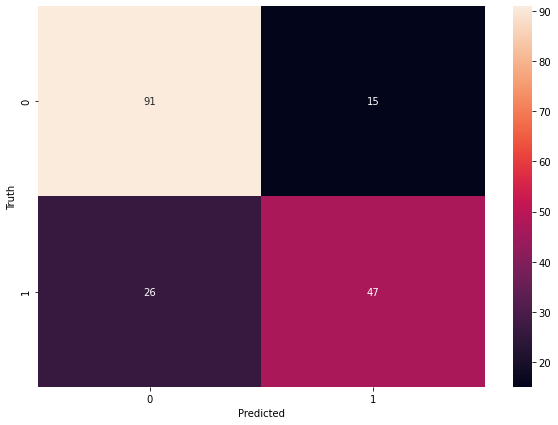

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')